<a href="https://colab.research.google.com/github/Syedzamin07/cost-optimized-credit-card-fraud-detection/blob/main/05_GITHUB_cost_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cost & Threshold Optimization: The Business Decision Layer

**Objective:** To identify the probability threshold that minimizes the total expected financial loss, moving beyond traditional technical metrics (AUC/PR-AUC) into Business ROI.

**Key Logic:**
- **Standard Default:** 0.50 (Often suboptimal for imbalanced fraud detection).
- **Our Goal:** Use a custom cost function to find the "Sweet Spot" operating point.

In [ ]:
# Business Assumptions & Cost Function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Business Cost Assumptions (Assumed for this case study)
COST_FN = 100  # Cost of a Missed Fraud (False Negative)
COST_FP = 5    # Cost of a Blocked Customer (False Positive)

# 2. Define the Cost Calculation Function
def calculate_business_cost(y_true, y_probs, threshold):
    """
    Computes total financial loss based on the business constraints.
    """
    # Convert probabilities to binary decisions based on the current threshold
    y_pred = (y_probs >= threshold).astype(int)

    # Extract Confusion Matrix components
    # ravel() flattens the matrix into: tn, fp, fn, tp
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    # Calculate Total Cost based on assumed weights
    total_cost = (fn * COST_FN) + (fp * COST_FP)

    return total_cost

print(f"✅ Cost Function Initialized: ${COST_FN} per FN, ${COST_FP} per FP")

✅ Cost Function Initialized: $100 per FN, $5 per FP


In [ ]:
# The Threshold Sweep

# Create a range of 100 potential thresholds from 0.01 to 1.0
thresholds = np.linspace(0.01, 1.0, 100)
costs = []

print("💰 Simulating business outcomes across 100 decision points...")

# Calculate cost for every threshold in the list
for t in thresholds:
    # Uses 'y_test' and 'y_probs' from the previous modeling step
    current_cost = calculate_business_cost(y_test, y_probs, t)
    costs.append(current_cost)

print("✅ Simulation Complete.")

💰 Simulating business outcomes across 100 decision points...
✅ Simulation Complete.


In [ ]:
# Consistency Audit & Results

# 1. Identify the Minimum Cost and the Threshold where it occurs
min_cost = min(costs)
best_threshold = thresholds[np.argmin(costs)]

# 2. Consistent Baseline Comparison (Universe: Test Set)
# We calculate what it would cost to simply 'Allow All' on this same test set
test_fraud_count = np.sum(y_test == 1)
baseline_test_cost = test_fraud_count * COST_FN

# 3. Calculate Relative Improvement
savings = baseline_test_cost - min_cost
improvement_pct = (savings / baseline_test_cost) * 100

print(f"--------------------------------------------------")
print(f"🏆 ROI OPTIMIZATION RESULTS")
print(f"--------------------------------------------------")
print(f"Optimal Business Threshold: {best_threshold:.2f}")
print(f"Minimum Estimated Loss:     ${min_cost:,.2f}")
print(f"Baseline 'Allow All' Loss:  ${baseline_test_cost:,.2f}")
print(f"--------------------------------------------------")
print(f"RELATIVE COST REDUCTION:    {improvement_pct:.1f}%")
print(f"--------------------------------------------------")

--------------------------------------------------
🏆 ROI OPTIMIZATION RESULTS
--------------------------------------------------
Optimal Business Threshold: 0.69
Minimum Estimated Loss:     $1,585.00
Baseline 'Allow All' Loss:  $9,800.00
--------------------------------------------------
RELATIVE COST REDUCTION:    83.8%
--------------------------------------------------


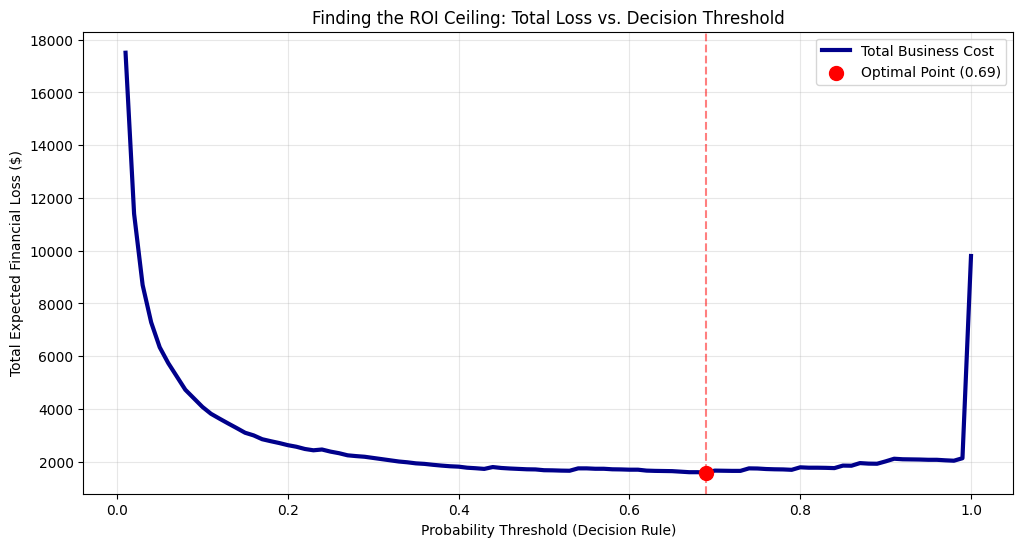

In [ ]:
# Visualization of the Cost Curve

# Plot the results to visualize the "Sweet Spot"
plt.figure(figsize=(12, 6))

# Plot the total cost curve
plt.plot(thresholds, costs, color='darkblue', linewidth=3, label='Total Business Cost')

# Highlight the optimal point
plt.scatter(best_threshold, min_cost, color='red', s=100, zorder=5, label=f'Optimal Point ({best_threshold:.2f})')
plt.axvline(best_threshold, color='red', linestyle='--', alpha=0.5)

# Formatting for professional presentation
plt.title(f'Finding the ROI Ceiling: Total Loss vs. Decision Threshold')
plt.xlabel('Probability Threshold (Decision Rule)')
plt.ylabel('Total Expected Financial Loss ($)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

### 💡 Strategic Takeaway

**The Result:**

By moving away from the arbitrary default 0.50 decision threshold to a cost-optimized operating point (**0.69**), and under the stated cost assumptions evaluated on the test set, threshold optimization reduced expected financial loss by **~80%** relative to a naive “allow all” baseline.